<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Exercise-Recommender/ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Load the exercise dataset
data = pd.read_csv('Exercise dataset.csv')

In [ ]:
# Showing the first 5 rows of the data set
data.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise
0,92.085190,1.760250,29.719488,59,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
1,61.089124,1.595499,23.997776,25,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...
2,82.454037,1.816538,24.987499,50,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...
3,101.713306,1.790696,31.720047,62,obese,6,"Low-Impact Cardio (Elliptical, Cycling); Seate...",Chair Squats; Modified Plank; Seated Leg Lifts...
4,62.347337,1.543259,26.178219,35,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...


In [ ]:
# Showing the first 5 rows of the data set
data.tail()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise
2487,98.456402,1.769473,31.445326,45,severe obese,7,"Seated Cardio Machines (Rowing, Recumbent Bike...",Chair-Assisted Squats; Gentle Stretching and F...
2488,55.256111,1.442648,26.549697,23,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
2489,106.683815,1.779544,33.688435,65,severe obese,7,"Seated Cardio Machines (Rowing, Recumbent Bike...",Chair-Assisted Squats; Gentle Stretching and F...
2490,83.748623,1.751525,27.298892,55,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
2491,103.344782,1.789984,32.254493,22,severe obese,7,"Seated Cardio Machines (Rowing, Recumbent Bike...",Chair-Assisted Squats; Gentle Stretching and F...


In [ ]:
# Identifing the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              2492 non-null   float64
 1   Height              2492 non-null   float64
 2   BMI                 2492 non-null   float64
 3   Age                 2492 non-null   int64  
 4   BMIcase             2492 non-null   object 
 5   Exercise Intensity  2492 non-null   int64  
 6   Gym Exercise        2492 non-null   object 
 7   Home Exercise       2492 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 155.9+ KB


In [ ]:
# Encode 'BMIcase' into numerical values
label_encoder = LabelEncoder()
data['BMIcase_encoded'] = label_encoder.fit_transform(data['BMIcase'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
scaler = MinMaxScaler()
X = data[['Weight', 'Height', 'BMI', 'Age']]
y = data['BMIcase_encoded']

X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)



In [ ]:
data.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise,BMIcase_encoded
0,92.085190,1.760250,29.719488,59,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...,4
1,61.089124,1.595499,23.997776,25,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...,2
2,82.454037,1.816538,24.987499,50,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...,2
3,101.713306,1.790696,31.720047,62,obese,6,"Low-Impact Cardio (Elliptical, Cycling); Seate...",Chair Squats; Modified Plank; Seated Leg Lifts...,3
4,62.347337,1.543259,26.178219,35,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...,4


In [ ]:
# Convert normalized data back to a DataFrame for clarity
import pandas as pd
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Checking the range of normalized numerical features
print("Minimum values after normalization:\n", X_normalized_df.min())
print("Maximum values after normalization:\n", X_normalized_df.max())


Minimum values after normalization:
 Weight    0.0
Height    0.0
BMI       0.0
Age       0.0
dtype: float64
Maximum values after normalization:
 Weight    1.0
Height    1.0
BMI       1.0
Age       1.0
dtype: float64


In [ ]:
import pandas as pd

# Convert the NumPy array back to a pandas DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
print(X_normalized_df.head())


     Weight    Height       BMI       Age
0  0.701418  0.841669  0.734662  0.872340
1  0.184782  0.466976  0.446996  0.148936
2  0.540888  0.969686  0.496755  0.680851
3  0.861898  0.910914  0.835242  0.936170
4  0.205753  0.348168  0.556620  0.361702


Target in y_train is imbalanced

Class 6: 636 counts, Proportion = 31.91%
Class 4: 463 counts, Proportion = 23.23%
Class 2: 436 counts, Proportion = 21.88%
Class 3: 382 counts, Proportion = 19.17%
Class 0: 45 counts, Proportion = 2.26%
Class 1: 22 counts, Proportion = 1.1%
Class 5: 9 counts, Proportion = 0.45%


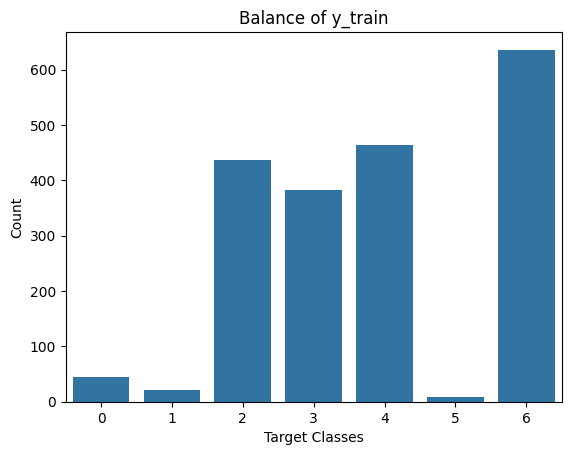

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating probability for y_train
p_class = y_train.value_counts() / len(y_train)

# Check for data mbalance
if max(p_class) - min(p_class) <= 0.05:
    print(f'Target in y_train is balanced\n')
else:
    print(f'Target in y_train is imbalanced\n')

# Printing class details
for target_class, proportion in p_class.items():
    print(f"Class {target_class}: {y_train.value_counts()[target_class]} counts, Proportion = {round(proportion * 100, 2)}%")

# Visualize the balance of y_train
sns.countplot(x=y_train)
plt.title("Balance of y_train")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Apply SMOTE only on the training set

sm = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, Y_train_resampled = sm.fit_resample(X_train, y_train)

# Checking the class distribution after SMOTE for the training set
print("Class distribution in Y_train after SMOTE:")
print(pd.Series(Y_train_resampled).value_counts())




Class distribution in Y_train after SMOTE:
BMIcase_encoded
4    636
2    636
6    636
3    636
0    636
1    636
5    636
Name: count, dtype: int64


Target in Y_train_resampled is balanced

Class 4: 636 counts, Proportion = 14.29%
Class 2: 636 counts, Proportion = 14.29%
Class 6: 636 counts, Proportion = 14.29%
Class 3: 636 counts, Proportion = 14.29%
Class 0: 636 counts, Proportion = 14.29%
Class 1: 636 counts, Proportion = 14.29%
Class 5: 636 counts, Proportion = 14.29%


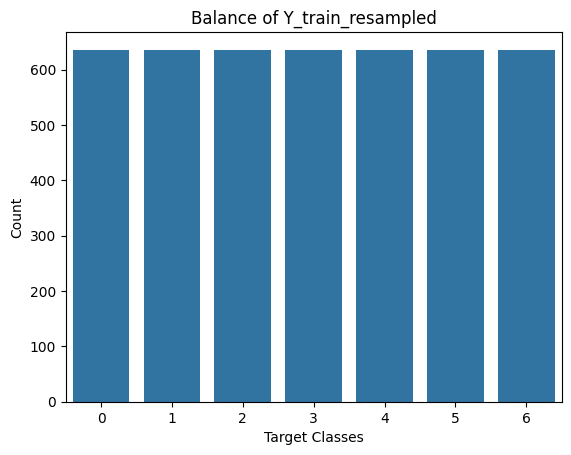

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking the class distribution after SMOTE
p_class = pd.Series(Y_train_resampled).value_counts() / len(Y_train_resampled)

# Check for balance
if max(p_class) - min(p_class) <= 0.05:
    print(f'Target in Y_train_resampled is balanced\n')
else:
    print(f'Target in Y_train_resampled is imbalanced\n')

# Print class details
for target_class, proportion in p_class.items():
    print(f"Class {target_class}: {pd.Series(Y_train_resampled).value_counts()[target_class]} counts, Proportion = {round(proportion * 100, 2)}%")

# Visualize the balance of Y_train_resampled
sns.countplot(x=pd.Series(Y_train_resampled))
plt.title("Balance of Y_train_resampled")
plt.xlabel("Target Classes")
plt.ylabel("Count")
plt.show()


Unique train labels: [0 1 2 3 4 5 6]
Unique test labels: [0 1 2 3 4 5 6]
Shape of X_train_resampled: (4452, 4)
Shape of Y_train_resampled: (4452,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3259 - loss: 1.6914 - val_accuracy: 0.6493 - val_loss: 0.9813
Epoch 2/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5524 - loss: 1.0239 - val_accuracy: 0.7435 - val_loss: 0.7571
Epoch 3/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6559 - loss: 0.8312 - val_accuracy: 0.7655 - val_loss: 0.6741
Epoch 4/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7169 - loss: 0.7030 - val_accuracy: 0.7695 - val_loss: 0.6390
Epoch 5/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7715 - loss: 0.5996 - val_accuracy: 0.7916 - val_loss: 0.5906
Epoch 6/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.5471 - val_accuracy: 0.7695 - val_loss: 0.5886
Epoch 7/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8074 - loss: 0.5081 - val_accuracy: 0.7856 - val_loss: 0.5630
Epoch 8/50
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8130 - loss: 0.4714 - val_accuracy: 0.

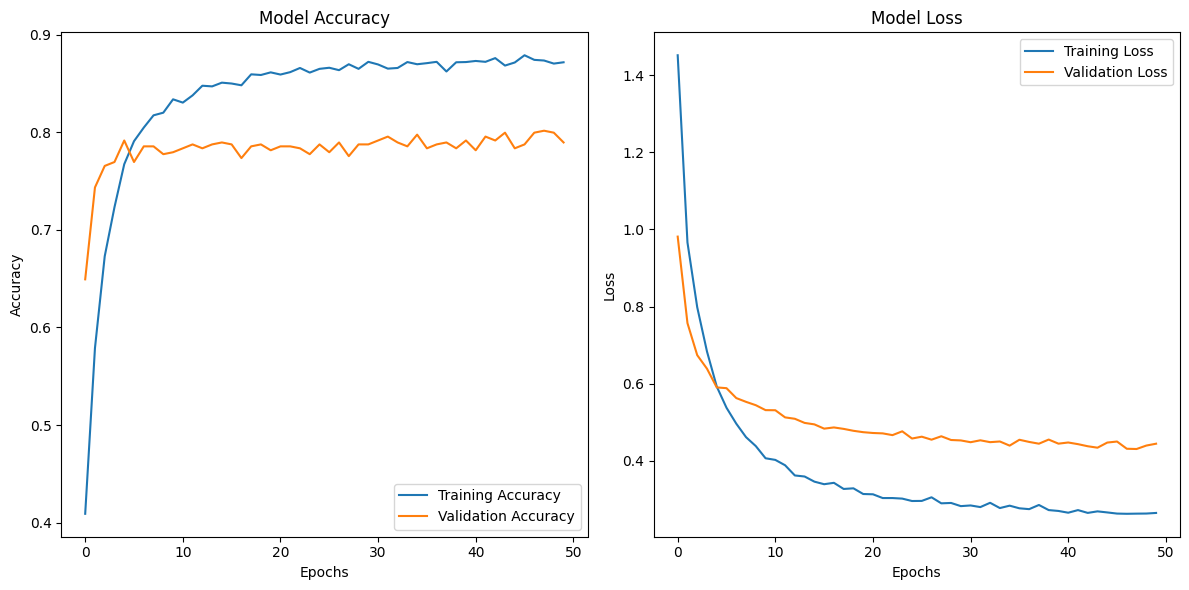

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Ensure labels start from 0
Y_train_resampled = Y_train_resampled - Y_train_resampled.min()
y_test = y_test - y_test.min()

# Verify label range
print("Unique train labels:", np.unique(Y_train_resampled))
print("Unique test labels:", np.unique(y_test))

# Define number of classes
num_classes = len(np.unique(Y_train_resampled))

# Convert data to NumPy arrays to avoid TensorFlow errors
X_train_resampled = np.array(X_train_resampled, dtype=np.float32)
Y_train_resampled = np.ravel(np.array(Y_train_resampled, dtype=np.int32))  # Ensure 1D
X_test = np.array(X_test, dtype=np.float32)
y_test = np.ravel(np.array(y_test, dtype=np.int32))  # Ensure 1D

# Verify shapes
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of Y_train_resampled:", Y_train_resampled.shape)

# Building the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_shape=(X_train_resampled.shape[1],), activation='relu'))
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Output layer (softmax for multi-class classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model on resampled and normalized data
history = model.fit(
    X_train_resampled,
    Y_train_resampled,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Calculate training accuracy
train_loss, train_accuracy = model.evaluate(X_train_resampled, Y_train_resampled, verbose=1)
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred_classes = y_pred_probs.argmax(axis=1)

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Plot training history
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
pip install --upgrade scikit-learn scikeras tensorflow numpy


  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
# model = KerasClassifier(model=create_model, verbose=0)


In [ ]:
import sklearn
import scikeras
print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


scikit-learn version: 1.6.1
scikeras version: 0.13.0


In [ ]:
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# import numpy as np
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# # Assuming X_train_resampled, Y_train_resampled, X_test, and y_test are already defined

# # Normalize the data
# scaler = StandardScaler()
# X_train_resampled = scaler.fit_transform(X_train_resampled)
# X_test_normalized = scaler.transform(X_test)  # Ensure test data is normalized

# # Number of classes (update based on your dataset)
# num_classes = len(np.unique(Y_train_resampled))

# # Define the function to create the model
# def create_model(optimizer='adam', neurons_1=128, neurons_2=64, dropout_rate=0.2):
#     model = Sequential()
#     model.add(Dense(neurons_1, input_dim=X_train_resampled.shape[1], activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neurons_2, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(num_classes, activation='softmax'))  # for multi-class classification
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Hyperparameter grid for manual search
# param_grid = {
#     'optimizer': ['adam', 'sgd'],      # optimizers
#     'neurons_1': [64, 128, 256],       # neurons in the first layer
#     'neurons_2': [32, 64, 128],        # neurons in the second layer
#     'dropout_rate': [0.2, 0.3],        # dropout rates
#     'batch_size': [32, 64],            # batch sizes
#     'epochs': [30, 50]                 # epochs
# }

# # Initialize variables to track the best model
# best_model = None
# best_params = None
# best_score = 0

# # Manual search over the parameter grid
# for optimizer in param_grid['optimizer']:
#     for neurons_1 in param_grid['neurons_1']:
#         for neurons_2 in param_grid['neurons_2']:
#             for dropout_rate in param_grid['dropout_rate']:
#                 for batch_size in param_grid['batch_size']:
#                     for epochs in param_grid['epochs']:
#                         print(f"Training with optimizer={optimizer}, neurons_1={neurons_1}, neurons_2={neurons_2}, dropout_rate={dropout_rate}, batch_size={batch_size}, epochs={epochs}")

#                         # Create and train the model
#                         model = create_model(optimizer=optimizer, neurons_1=neurons_1, neurons_2=neurons_2, dropout_rate=dropout_rate)

#                         # Callbacks
#                         early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#                         model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

#                         history = model.fit(
#                             X_train_resampled, Y_train_resampled,
#                             batch_size=batch_size,
#                             epochs=epochs,
#                             verbose=0,
#                             validation_split=0.2,
#                             callbacks=[early_stopping, model_checkpoint]
#                         )

#                         # Evaluate on validation set
#                         val_accuracy = max(history.history['val_accuracy'])
#                         print(f"Validation Accuracy: {val_accuracy}")

#                         # Track the best model
#                         if val_accuracy > best_score:
#                             best_score = val_accuracy
#                             best_model = model
#                             best_params = {
#                                 'optimizer': optimizer,
#                                 'neurons_1': neurons_1,
#                                 'neurons_2': neurons_2,
#                                 'dropout_rate': dropout_rate,
#                                 'batch_size': batch_size,
#                                 'epochs': epochs
#                             }

# # Print the best model and its parameters
# print("Best Model Parameters:")
# print(best_params)

# # Evaluate the best model on the test set
# test_accuracy = best_model.evaluate(X_test_normalized, y_test, verbose=1)
# print(f"Test Accuracy of the best model: {test_accuracy[1]}")

# # Generate classification report
# y_pred = best_model.predict(X_test_normalized)
# y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class labels
# print(classification_report(y_test, y_pred_classes))


In [ ]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming X_train_resampled, Y_train_resampled, X_test, and y_test are already defined

# Normalize the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)  # Ensure test data is normalized

# Number of classes (update based on your dataset)
num_classes = len(np.unique(Y_train_resampled))

# Define the function to create the model
def create_model(optimizer='adam', neurons_1=128, neurons_2=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons_1, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))  # for multi-class classification
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Hyperparameter grid for manual search
param_grid = {
    'optimizer': ['adam', 'sgd'],      # optimizers
    'neurons_1': [64, 128, 256],       # neurons in the first layer
    'neurons_2': [32, 64, 128],        # neurons in the second layer
    'dropout_rate': [0.2, 0.3],        # dropout rates
    'batch_size': [32, 64],            # batch sizes
    'epochs': [30, 50]                 # epochs
}


# Initialize variables to track the best model
best_model = None
best_params = None
best_score = 0

# Manual search over the parameter grid
for optimizer in param_grid['optimizer']:
    for neurons_1 in param_grid['neurons_1']:
        for neurons_2 in param_grid['neurons_2']:
            for dropout_rate in param_grid['dropout_rate']:
                for batch_size in param_grid['batch_size']:
                    for epochs in param_grid['epochs']:
                        print(f"Training with optimizer={optimizer}, neurons_1={neurons_1}, neurons_2={neurons_2}, dropout_rate={dropout_rate}, batch_size={batch_size}, epochs={epochs}")

                        # Create and train the model
                        model = create_model(optimizer=optimizer, neurons_1=neurons_1, neurons_2=neurons_2, dropout_rate=dropout_rate)

                        # Callbacks
                        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
                        model_checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss')

                        history = model.fit(
                            X_train_resampled, Y_train_resampled,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            validation_split=0.2,
                            callbacks=[early_stopping, model_checkpoint]
                        )

                        # Evaluate on validation set
                        val_accuracy = max(history.history['val_accuracy'])
                        train_accuracy = max(history.history['accuracy'])
                        print(f"Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}")

                        # Track the best model
                        if val_accuracy > best_score:
                            best_score = val_accuracy
                            best_model = model
                            best_params = {
                                'optimizer': optimizer,
                                'neurons_1': neurons_1,
                                'neurons_2': neurons_2,
                                'dropout_rate': dropout_rate,
                                'batch_size': batch_size,
                                'epochs': epochs,
                                'train_accuracy': train_accuracy  # Added training accuracy
                            }

# Print the best model and its parameters
print("Best Model Parameters:")
print(best_params)

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test_normalized, y_test, verbose=1)
train_loss, train_accuracy = best_model.evaluate(X_train_resampled, Y_train_resampled, verbose=1)
print(f"Train Accuracy of the best model: {train_accuracy}")
print(f"Test Accuracy of the best model: {test_accuracy}")

# Generate classification report
y_pred = best_model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class labels
print(classification_report(y_test, y_pred_classes))


Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Accuracy: 0.6950294971466064, Validation Accuracy: 0.21773289144039154
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.6720022559165955, Validation Accuracy: 0.2143658846616745
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.6686323881149292, Validation Accuracy: 0.20426486432552338
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.6632968187332153, Validation Accuracy: 0.19191919267177582
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.66245436668396, Validation Accuracy: 0.2053872048854828
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.6644201278686523, Validation Accuracy: 0.20202019810676575
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.5950575470924377, Validation Accuracy: 0.20202019810676575
Training with optimizer=adam, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.6169615387916565, Validation Accuracy: 0.18518517911434174
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.7349058985710144, Validation Accuracy: 0.22558923065662384
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.7326593399047852, Validation Accuracy: 0.2390572428703308
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.6767761707305908, Validation Accuracy: 0.19977553188800812
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.672563910484314, Validation Accuracy: 0.20202019810676575
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.7090705037117004, Validation Accuracy: 0.2065095454454422
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.7096320986747742, Validation Accuracy: 0.2132435441017151
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.6458860039710999, Validation Accuracy: 0.1896745264530182
Training with optimizer=adam, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.6554338932037354, Validation Accuracy: 0.19977553188800812
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.8525695204734802, Validation Accuracy: 0.25925925374031067
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.8646447658538818, Validation Accuracy: 0.2626262605190277
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.7239539623260498, Validation Accuracy: 0.2210998833179474
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.7172142863273621, Validation Accuracy: 0.20875421166419983
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.8374052047729492, Validation Accuracy: 0.25589224696159363
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.8598708510398865, Validation Accuracy: 0.2615039348602295
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.6798651814460754, Validation Accuracy: 0.20875421166419983
Training with optimizer=adam, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.6871665120124817, Validation Accuracy: 0.20426486432552338
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.8486379981040955, Validation Accuracy: 0.24017956852912903
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.7374333143234253, Validation Accuracy: 0.2390572428703308
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.7087896466255188, Validation Accuracy: 0.2210998833179474
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.6795843839645386, Validation Accuracy: 0.2053872048854828
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.6972760558128357, Validation Accuracy: 0.2210998833179474
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.7149677276611328, Validation Accuracy: 0.22446689009666443
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.6691940426826477, Validation Accuracy: 0.21099887788295746
Training with optimizer=adam, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.6686323881149292, Validation Accuracy: 0.2143658846616745
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.7739399075508118, Validation Accuracy: 0.24354657530784607
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.8663296699523926, Validation Accuracy: 0.2603815793991089
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.7408031225204468, Validation Accuracy: 0.2143658846616745
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.7205840945243835, Validation Accuracy: 0.21661055088043213
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.7464195489883423, Validation Accuracy: 0.2300785630941391
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.740241527557373, Validation Accuracy: 0.22558923065662384
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.7014883756637573, Validation Accuracy: 0.21773289144039154
Training with optimizer=adam, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.7012075185775757, Validation Accuracy: 0.2132435441017151
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.8635214567184448, Validation Accuracy: 0.25813692808151245
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.8609941005706787, Validation Accuracy: 0.2603815793991089
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.8536927700042725, Validation Accuracy: 0.24130190908908844
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.7596181035041809, Validation Accuracy: 0.2210998833179474
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.8570626378059387, Validation Accuracy: 0.2525252401828766
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.8657680153846741, Validation Accuracy: 0.2603815793991089
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.7127211689949036, Validation Accuracy: 0.2289562225341797
Training with optimizer=adam, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.821117639541626, Validation Accuracy: 0.2312009036540985
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.8553776741027832, Validation Accuracy: 0.2525252401828766
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.7789946794509888, Validation Accuracy: 0.24130190908908844
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.7349058985710144, Validation Accuracy: 0.22446689009666443
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.7540016770362854, Validation Accuracy: 0.21997755765914917
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.8477955460548401, Validation Accuracy: 0.2390572428703308
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.744172990322113, Validation Accuracy: 0.23344556987285614
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.7180567383766174, Validation Accuracy: 0.22558923065662384
Training with optimizer=adam, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.7096320986747742, Validation Accuracy: 0.23232322931289673
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.8090423941612244, Validation Accuracy: 0.25140291452407837
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.8677337765693665, Validation Accuracy: 0.3400673270225525
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.771131694316864, Validation Accuracy: 0.22671155631542206
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.7705700397491455, Validation Accuracy: 0.21997755765914917
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.854254424571991, Validation Accuracy: 0.25140291452407837
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.7871384620666504, Validation Accuracy: 0.24017956852912903
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.7506318688392639, Validation Accuracy: 0.2289562225341797
Training with optimizer=adam, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.74922776222229, Validation Accuracy: 0.22671155631542206
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.8618365526199341, Validation Accuracy: 0.2626262605190277
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.8688570857048035, Validation Accuracy: 0.45903480052948
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.8595899939537048, Validation Accuracy: 0.2469135820865631
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.7910699248313904, Validation Accuracy: 0.23681257665157318
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.8615557551383972, Validation Accuracy: 0.25701460242271423
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.8660488724708557, Validation Accuracy: 0.5622895359992981
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.7832069396972656, Validation Accuracy: 0.22783389687538147
Training with optimizer=adam, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.8657680153846741, Validation Accuracy: 0.24915824830532074
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5181128978729248, Validation Accuracy: 0.16273850202560425
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.547318160533905, Validation Accuracy: 0.1503928154706955
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.45549002289772034, Validation Accuracy: 0.10662177205085754
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.46812692284584045, Validation Accuracy: 0.09876543283462524
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.49171581864356995, Validation Accuracy: 0.13355779647827148
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5065992474555969, Validation Accuracy: 0.12008978426456451
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.4462229609489441, Validation Accuracy: 0.06397306174039841
Training with optimizer=sgd, neurons_1=64, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.4512777328491211, Validation Accuracy: 0.08866441994905472
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5638865232467651, Validation Accuracy: 0.1593714952468872
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5588318109512329, Validation Accuracy: 0.1582491546869278
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.4568941295146942, Validation Accuracy: 0.06621773540973663
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.4799213707447052, Validation Accuracy: 0.0796857476234436
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5388935804367065, Validation Accuracy: 0.12906846404075623
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5105307698249817, Validation Accuracy: 0.14029181003570557
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.44257232546806335, Validation Accuracy: 0.0718294084072113
Training with optimizer=sgd, neurons_1=64, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.4613872468471527, Validation Accuracy: 0.1189674511551857
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.589441180229187, Validation Accuracy: 0.16049382090568542
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5765234231948853, Validation Accuracy: 0.14814814925193787
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.4976130425930023, Validation Accuracy: 0.07519640773534775
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.45549002289772034, Validation Accuracy: 0.08978675305843353
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5397360324859619, Validation Accuracy: 0.1425364762544632
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5579892992973328, Validation Accuracy: 0.17620651423931122
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.4664420187473297, Validation Accuracy: 0.13131313025951385
Training with optimizer=sgd, neurons_1=64, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.46812692284584045, Validation Accuracy: 0.07519640773534775
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5669755935668945, Validation Accuracy: 0.1358024626970291
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5655714869499207, Validation Accuracy: 0.14702580869197845
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.4734625220298767, Validation Accuracy: 0.06285072863101959
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.5068801045417786, Validation Accuracy: 0.13019078969955444
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5464757084846497, Validation Accuracy: 0.16161616146564484
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5276607871055603, Validation Accuracy: 0.1032547727227211
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.4627913534641266, Validation Accuracy: 0.07407407462596893
Training with optimizer=sgd, neurons_1=128, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.4276888370513916, Validation Accuracy: 0.04377104341983795
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5709070563316345, Validation Accuracy: 0.1503928154706955
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5658522844314575, Validation Accuracy: 0.15488214790821075
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.47009268403053284, Validation Accuracy: 0.0875420868396759
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.5110923647880554, Validation Accuracy: 0.07407407462596893
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5425442457199097, Validation Accuracy: 0.1358024626970291
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5577085018157959, Validation Accuracy: 0.13916946947574615
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.4619489014148712, Validation Accuracy: 0.07070706784725189
Training with optimizer=sgd, neurons_1=128, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.4768323600292206, Validation Accuracy: 0.10101009905338287
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5874754190444946, Validation Accuracy: 0.1661054939031601
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5655714869499207, Validation Accuracy: 0.15375982224941254
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.49536648392677307, Validation Accuracy: 0.0796857476234436
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.5040718913078308, Validation Accuracy: 0.06060606241226196
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5638865232467651, Validation Accuracy: 0.15263748168945312
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5627632737159729, Validation Accuracy: 0.1515151560306549
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.49733221530914307, Validation Accuracy: 0.09652076661586761
Training with optimizer=sgd, neurons_1=128, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.4900308847427368, Validation Accuracy: 0.08193041384220123
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5358045697212219, Validation Accuracy: 0.1358024626970291
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5683796405792236, Validation Accuracy: 0.09427609294652939
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.4976130425930023, Validation Accuracy: 0.06846240162849426
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.5169895887374878, Validation Accuracy: 0.1189674511551857
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5363661646842957, Validation Accuracy: 0.1503928154706955
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5638865232467651, Validation Accuracy: 0.1425364762544632
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.47009268403053284, Validation Accuracy: 0.07631874084472656
Training with optimizer=sgd, neurons_1=256, neurons_2=32, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.48020219802856445, Validation Accuracy: 0.0718294084072113
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.5829823017120361, Validation Accuracy: 0.1436588168144226
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.5987082123756409, Validation Accuracy: 0.16386082768440247
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.529345691204071, Validation Accuracy: 0.11672278493642807
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.49480482935905457, Validation Accuracy: 0.10213243216276169
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5821398496627808, Validation Accuracy: 0.1189674511551857
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.5958999991416931, Validation Accuracy: 0.1672278344631195
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.4919966161251068, Validation Accuracy: 0.13804714381694794
Training with optimizer=sgd, neurons_1=256, neurons_2=64, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.5032294392585754, Validation Accuracy: 0.09427609294652939
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=30


Training Accuracy: 0.6248244643211365, Validation Accuracy: 0.14478114247322083
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=32, epochs=50


Training Accuracy: 0.6093794107437134, Validation Accuracy: 0.17059484124183655
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=30


Training Accuracy: 0.5195170044898987, Validation Accuracy: 0.10886644572019577
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.2, batch_size=64, epochs=50


Training Accuracy: 0.5150238871574402, Validation Accuracy: 0.10886644572019577
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=30


Training Accuracy: 0.5916877388954163, Validation Accuracy: 0.14927048981189728
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=32, epochs=50


Training Accuracy: 0.58045494556427, Validation Accuracy: 0.14590348303318024
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=30


Training Accuracy: 0.5178320407867432, Validation Accuracy: 0.08417508751153946
Training with optimizer=sgd, neurons_1=256, neurons_2=128, dropout_rate=0.3, batch_size=64, epochs=50


Training Accuracy: 0.5234484672546387, Validation Accuracy: 0.07856341451406479
Best Model Parameters:
{'optimizer': 'adam', 'neurons_1': 256, 'neurons_2': 128, 'dropout_rate': 0.3, 'batch_size': 32, 'epochs': 50, 'train_accuracy': 0.8660488724708557}
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7851 - loss: 0.4334 
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.3267
Train Accuracy of the best model: 0.8171608448028564
Test Accuracy of the best model: 0.8036072254180908
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.71      1.00      0.83         5
           2       0.96      0.98      0.97       114
           3       0.78      0.56      0.66       101
           4       0.82      0.94      0.88       112
           5       1.00      0.75      0.86         4
           6       0.67      0.71      0.69       148

    accuracy         